# Exploring an Image Dataset with Histogram of Oriented Gradient (HOG)

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from skimage.feature import hog

## Dataset

In [2]:
df = pd.DataFrame({'image_path': sorted(glob.glob('/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess/*/*'))})
df['class'] = df['image_path'].apply(lambda x: x.split('/')[-2])
df.head()

,image_path,class
0,/kaggle/input/chessman-image-dataset/Chessman-...,Bishop
1,/kaggle/input/chessman-image-dataset/Chessman-...,Bishop
2,/kaggle/input/chessman-image-dataset/Chessman-...,Bishop
3,/kaggle/input/chessman-image-dataset/Chessman-...,Bishop
4,/kaggle/input/chessman-image-dataset/Chessman-...,Bishop


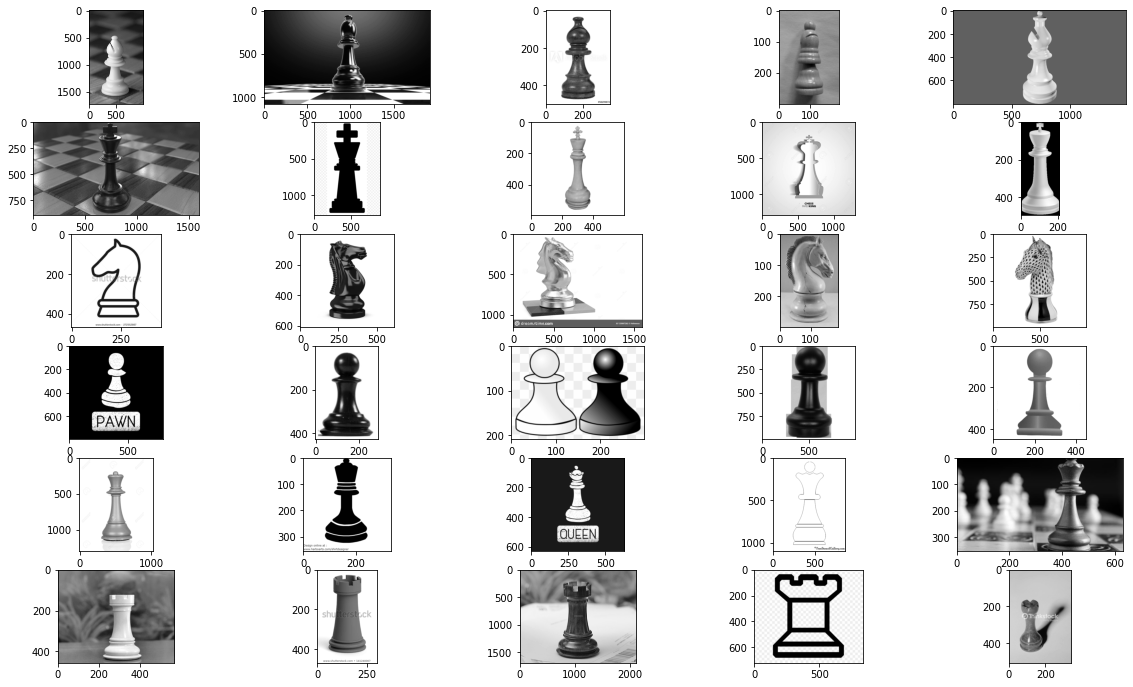

In [3]:
labels = sorted(df['class'].unique())
fig, ax = plt.subplots(len(labels), 5, figsize=(20, 12))
for row, label in enumerate(labels):
    for col, im_pth in enumerate(df[df['class'] == label]['image_path'].sample(n=5, random_state=0).values):
        ax[row][col].imshow(np.array(Image.open(im_pth).convert('L')), cmap='gray')

In [4]:
all_images = np.array([np.array(Image.open(fpath).resize((224, 224)).convert('L')) for fpath in df['image_path']])
len(all_images)

556

## Calculating HOG Features

In [5]:
hog_features = [hog(img) for img in all_images]

## Implementing Clustering

In [6]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(random_state=0).fit(hog_features)
df['cluster'] = clustering.predict(hog_features)

29


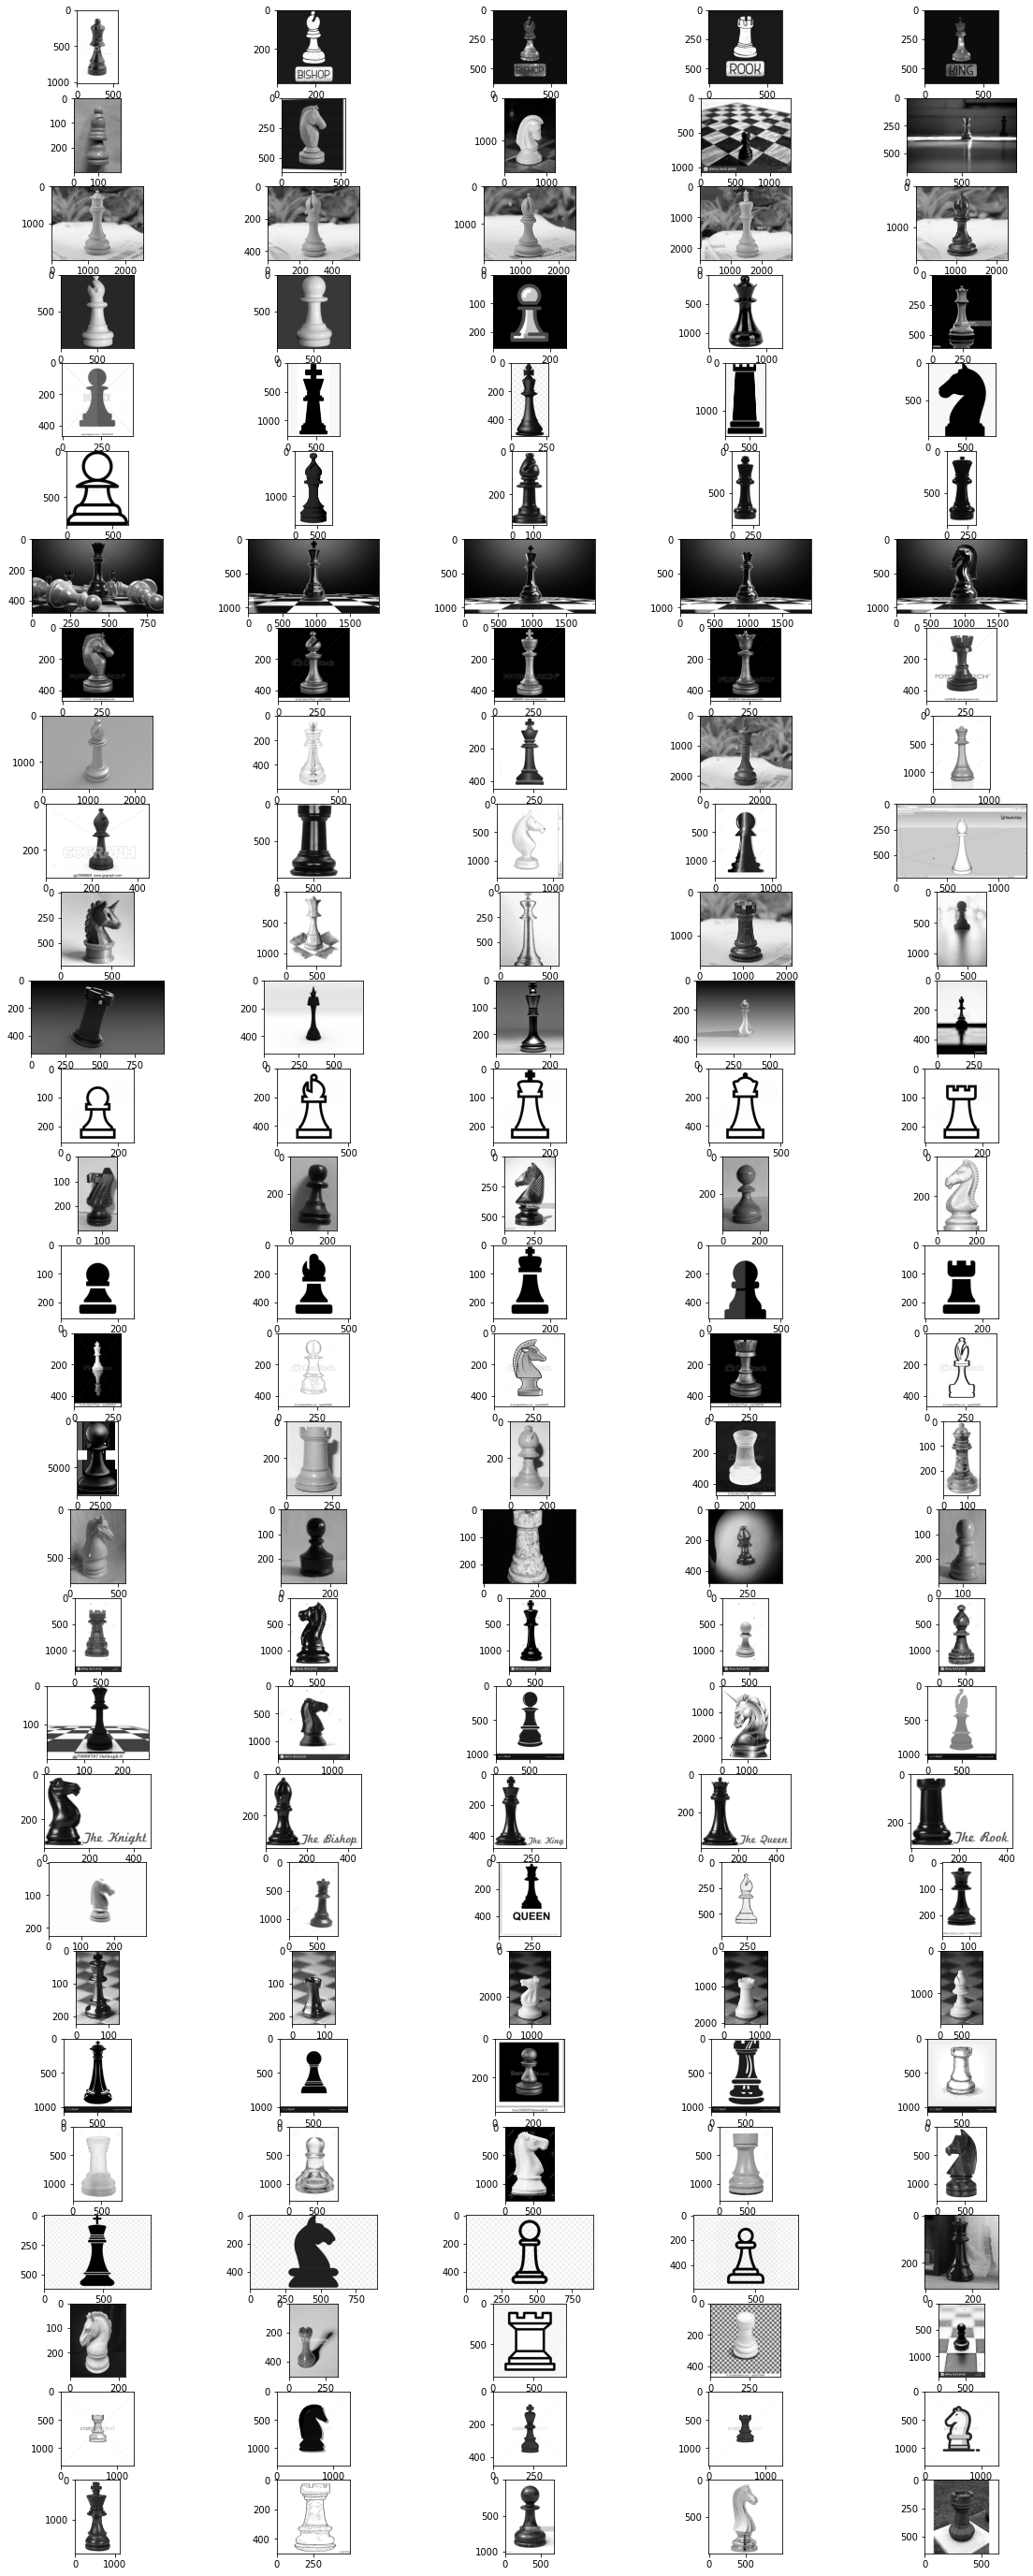

In [7]:
labels = sorted(df['cluster'].value_counts().loc[lambda x: x>=5].index.values)
print(len(labels))
fig, ax = plt.subplots(len(labels), 5, figsize=(20, 50))
for row, label in enumerate(labels):
    for col, im_pth in enumerate(df[df['cluster'] == label]['image_path'].sample(n=5, random_state=0).values):
        ax[row][col].imshow(np.array(Image.open(im_pth).convert('L')), cmap='gray')